# DTree Classifer Demonstration

In this tutorial we will demonstrate how to use the `DecisionTreeClassifer` class in `scikit-learn` to perform classifications predictions. 


## 1.0 Setup
Import modules


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

np.random.seed(1)

## 2.0 Load data
Load data (it's already cleaned and preprocessed)


In [3]:
# Uncomment the following snippet of code to debug problems with finding the .csv file path
# This snippet of code will exit the program and print the current working directory.
import os
print(os.getcwd())

C:\Users\Sravani\Downloads


In [4]:
X_train = pd.read_csv(r'C:\DSP\WE04\airbnb_train_X_price_gte_150.csv') 
y_train = pd.read_csv(r'C:\DSP\WE04\airbnb_train_y_price_gte_150.csv') 
X_test = pd.read_csv(r'C:\DSP\WE04\airbnb_test_X_price_gte_150.csv') 
y_test = pd.read_csv(r'C:\DSP\WE04\airbnb_test_y_price_gte_150.csv') 

## NOTE: In this next section, GridSearch will use K Fold Cross Validation 

K-Fold cross validation is used to avoid overfitting. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. 

![cross validation diagram](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


## 3.0 Model the data

First, we will create a dataframe to hold all the results of our models.

In [5]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

Fit a polynomial kernal SVM classification model using random search

In [11]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'C': np.arange(5,15),
    'degree': [3, 4,5],
    'gamma': ['scale', 'auto'],
    'kernel':['poly']
    
}

Poly_kernal_R_SVM = SVC()
rand_search = RandomizedSearchCV(estimator = Poly_kernal_R_SVM, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

C:\Users\Sravani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 60 is smaller than n_iter=500. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\Sravani\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best precision score is 0.8505613355263482
... with parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'C': 14}


Fit a polynomial kernal SVM classification model using Grid search

In [15]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'C': np.arange(8,17),
    'degree': [2, 3,4],
    'gamma': ['scale', 'auto'],
    'kernel':['poly']
    
}

Poly_kernal_G_SVM = SVC()
grid_search = GridSearchCV(estimator = Poly_kernal_G_SVM, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\Sravani\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best precision score is 0.8528429083892224
... with parameters: {'C': 11, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [16]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,53),  
    'min_samples_leaf': np.arange(1,53),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 53), 
    'max_depth': np.arange(1,53), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best precision score is 0.8599352476972617
... with parameters: {'min_samples_split': 7, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.0031, 'max_leaf_nodes': 29, 'max_depth': 9, 'criterion': 'entropy'}


C:\Users\Sravani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sravani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sravani\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Sravani\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a fl

Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [17]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(5,9),  
    'min_samples_leaf': np.arange(6,10),
    'min_impurity_decrease': np.arange(0.0048, 0.0054, 0.0001),
    'max_leaf_nodes': np.arange(5,10), 
    'max_depth': np.arange(1,10), 
    'criterion': ['entropy'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits
The best precision score is 0.8324707341039982
... with parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0048, 'min_samples_leaf': 6, 'min_samples_split': 5}


## 5.0 Importance of features

In [18]:
np.round(grid_search.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.05, 0.11, 0.75, 0.  , 0.  , 0.07, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

## 6.0 Diagrams of DTrees

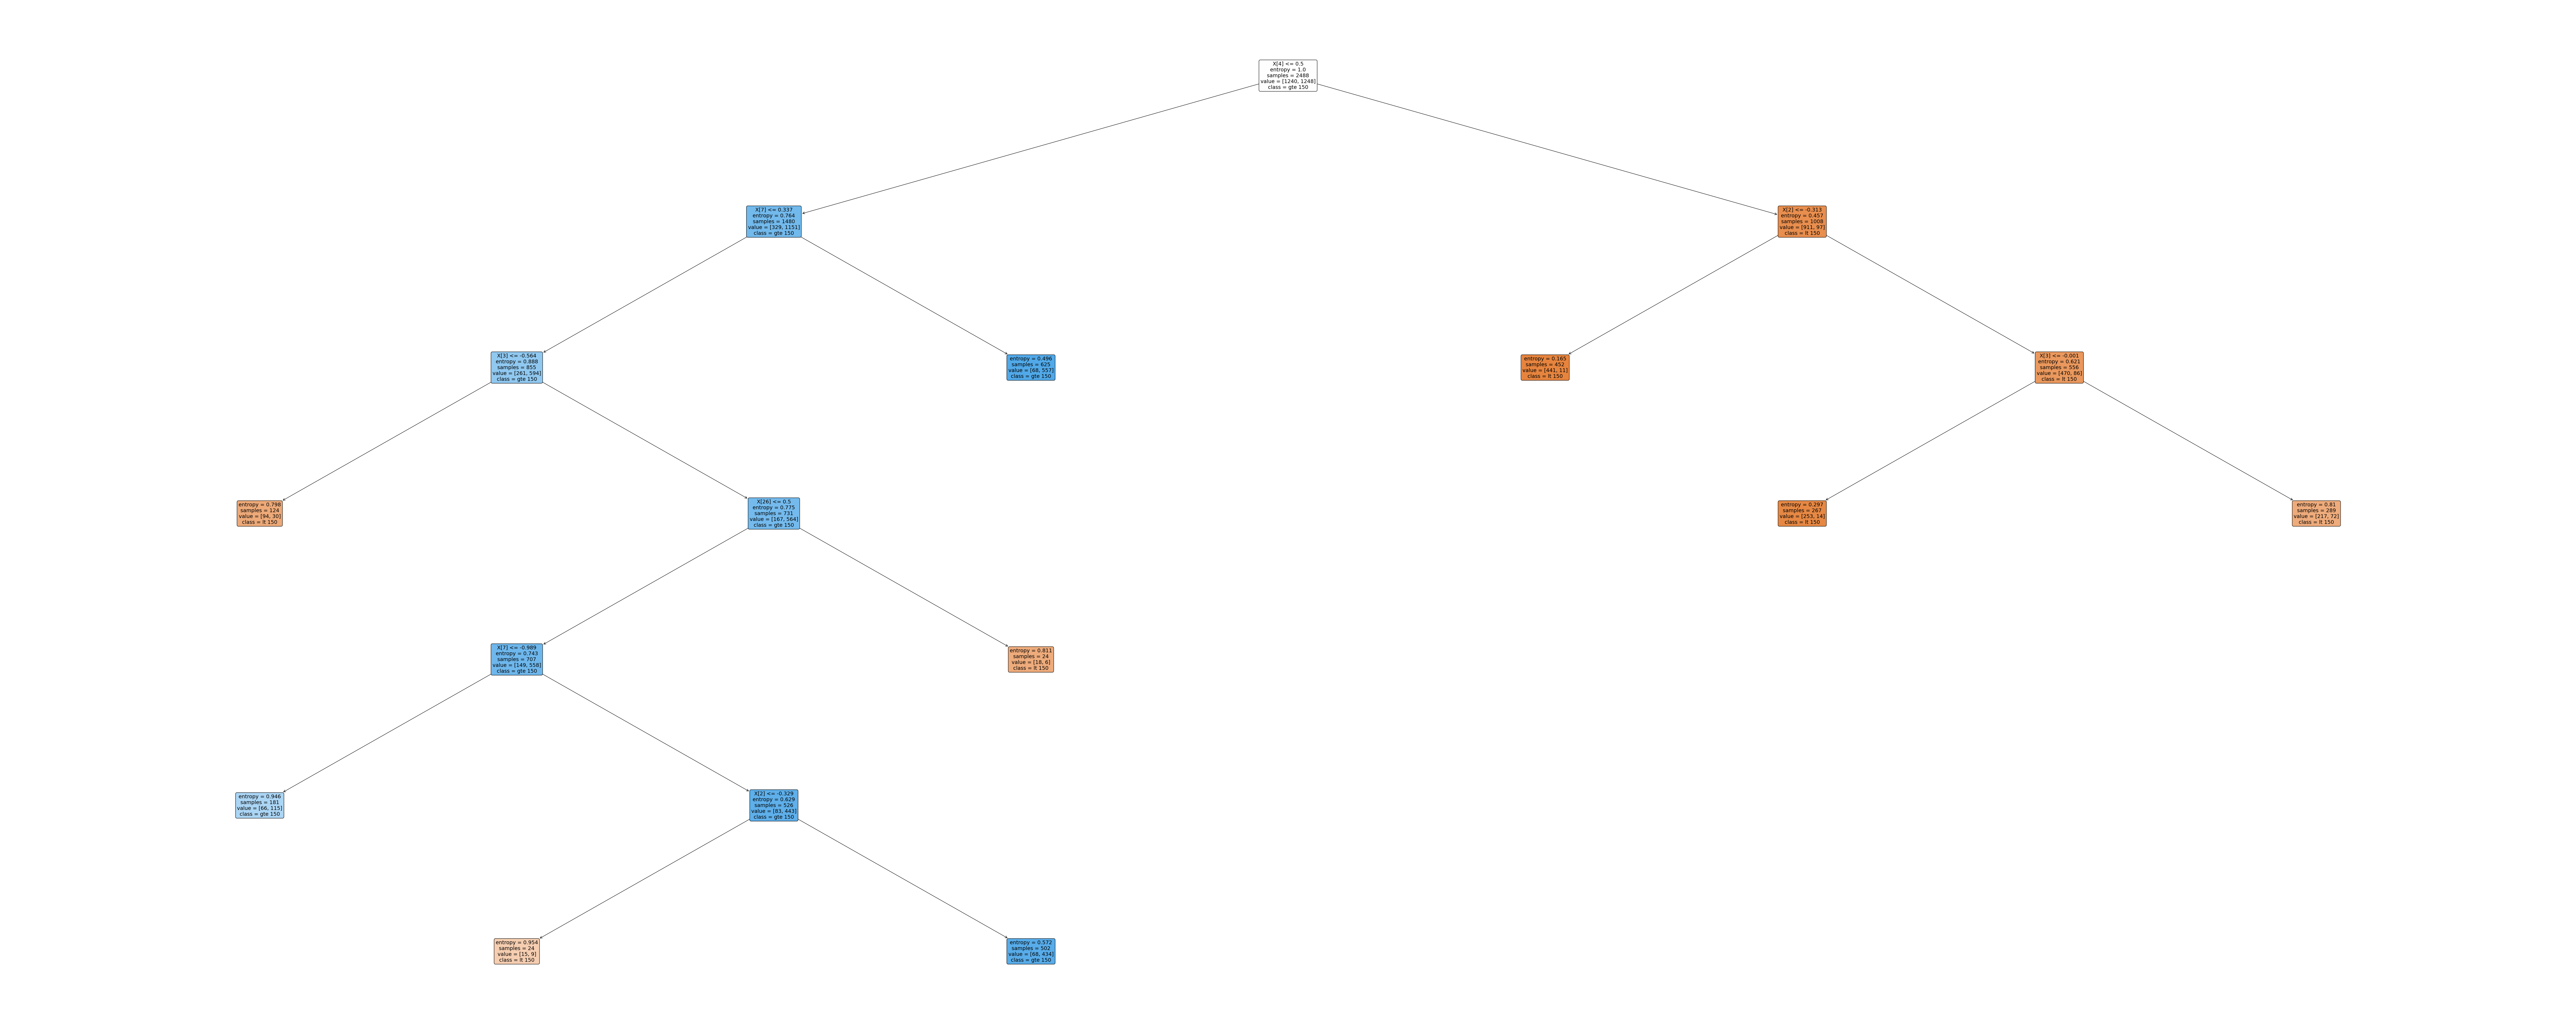

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

Four different models such as SVM model with random search, SVM model with Grid search, Decision tree with random search and Decision tree with Grid search are being executed as shown above. As per the results among four models according to precision score Decision tree model with random search stands out best with 0.8599352476972617 score and second best goes to SVM model with Grid search with 0.8528429083892224 score. So finally Decision tree model with random search fits best followed by SVM model with Grid search and SVM model with random search and Decision tree model with Grid search fits less when compared to others.